In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [ ]:
hotel_data=pd.read_excel("hotel_reviews.xlsx")
hotel_data

Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]

# Informations about dataset

In [ ]:
# Checking the how many rows and columns in dataset

hotel_data.shape

(20491, 2)

In [ ]:
# Checking the duplicate values

hotel_data.duplicated().sum()

0

In [ ]:
hotel_data.columns

Index(['Review', 'Rating'], dtype='object')

In [ ]:
# Checking information about the DataFrame

hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
# Checking the missing values

hotel_data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
# Checking the unique values

hotel_data.nunique()

Review    20491
Rating        5
dtype: int64

In [ ]:
hotel_data.describe()

Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000

In [ ]:
# Value count for "Rating" columns

hotel_data["Rating"].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

#
    -> There are no null values to look at here.
    -> The Ratings column also only has values from 1 to 5, so no weird values.
    -> There are definitely more positive than negative reviews, so that is something to keep in mind for the model.
    -> As for ratings, there are no blank strings. That means there is no cleaning that needs to be done in that regard.

# EDA

Text(0.5, 1.0, 'Rating Distribution Across Dataset')

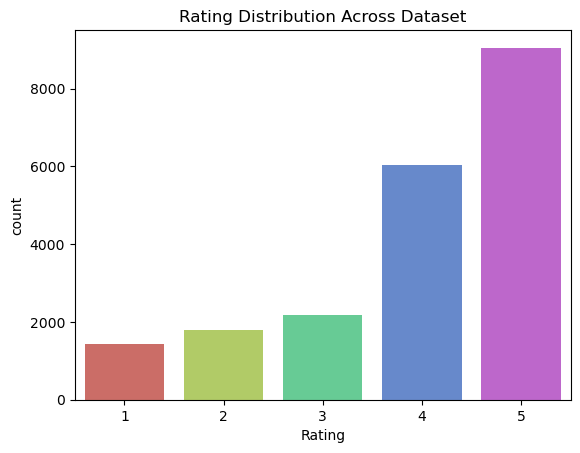

In [ ]:
# Count plot for 'Rating' column

sns.countplot(x='Rating', data=hotel_data, palette='hls')
plt.title("Rating Distribution Across Dataset")

#
    -> From count plot we can see positive reviews are more than negative and most of people given 4 & 5 star rating.

In [ ]:
# Pie plot with the percentage of distribution of ratings across the dataset

plt.pie(hotel_data['Rating'].value_counts(),labels=['5.0','4.0','3.0','2.0','1.0'], autopct='%1.2f%%')
plt.title("Rating Percentage Distribution Across Dataset")
plt.show()

#
    -> From pie chart we can see 73.66% people given 4 & 5 star rating.

In [ ]:
# Calculate how many words in every review

review_len = pd.Series([len(review.split()) for review in hotel_data['Review']])
review_len

0         87
1        250
2        217
3         89
4        191
        ... 
20486    109
20487     39
20488     63
20489    781
20490     90
Length: 20491, dtype: int64

In [ ]:
review_len.describe()

count    20491.000000
mean       104.375726
std        100.656154
min          7.000000
25%         48.000000
50%         77.000000
75%        124.000000
max       1931.000000
dtype: float64

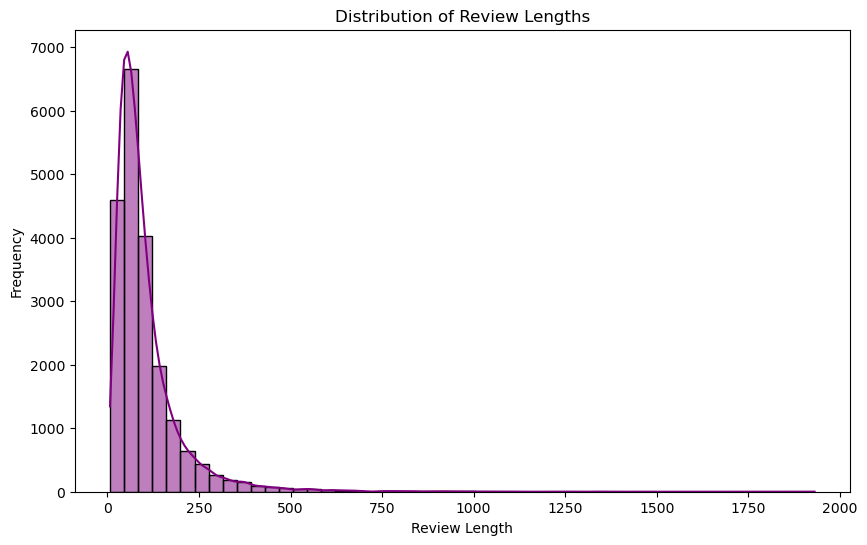

In [ ]:
# Plot the distribution of review lengths

plt.figure(figsize=(10, 6))
sns.histplot(review_len, bins=50, kde=True,color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Distribution of word lengths in review using "Box plot"

plt.figure(figsize=(10, 6))
sns.boxplot(x=hotel_data['Rating'], y=hotel_data.Review.str.split().apply(len), data=hotel_data, palette='Set3')
plt.title('Review Length Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

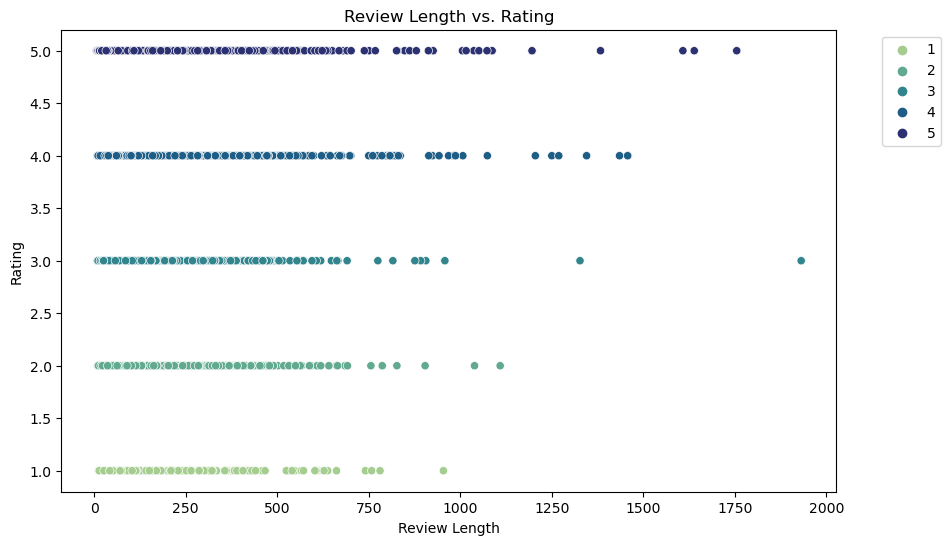

In [ ]:
# Distribution of character lengths in review using "scatter plot"

plt.figure(figsize=(10, 6))
sns.scatterplot(x=hotel_data.Review.str.split().apply(len), y=hotel_data['Rating'], data=hotel_data, palette='crest', hue='Rating')
plt.title('Review Length vs. Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
# Distribution of text length for 5 Star Rating

fig = plt.figure(figsize=(14,7))
hotel_data["Length"] = hotel_data.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(hotel_data[hotel_data['Rating']==5]['Length'], ax=ax1,color='green')
fig.suptitle('Distribution of text length for 5 Star Rating', fontsize=16)
display(hotel_data.Length[hotel_data.Rating==5].describe())

count    9054.000000
mean       93.963773
std        90.977999
min         7.000000
25%        44.000000
50%        69.000000
75%       111.000000
max      1755.000000
Name: Length, dtype: float64

count    6039.000000
mean      107.771651
std       107.132817
min         9.000000
25%        49.000000
50%        78.000000
75%       128.000000
max      1458.000000
Name: Length, dtype: float64

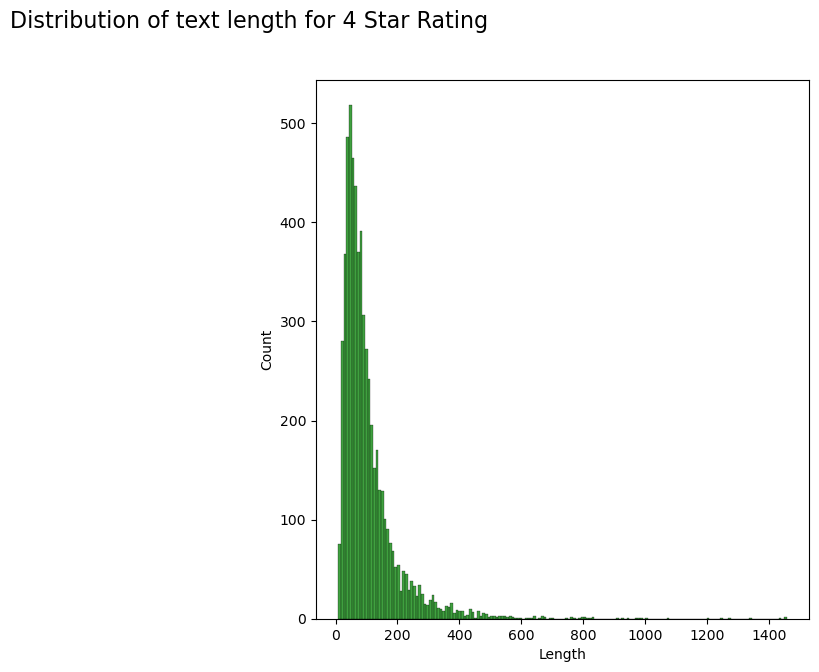

In [ ]:
# Distribution of text length for 4 Star Rating

fig = plt.figure(figsize=(14,7))
hotel_data["Length"] = hotel_data.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(hotel_data[hotel_data['Rating']==4]['Length'], ax=ax1,color='green')
fig.suptitle('Distribution of text length for 4 Star Rating', fontsize=16)
display(hotel_data.Length[hotel_data.Rating==4].describe())

In [ ]:
# Distribution of text length for 3 Star Rating

fig = plt.figure(figsize=(14,7))
hotel_data["Length"] = hotel_data.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(hotel_data[hotel_data['Rating']==3]['Length'], ax=ax1,color='green')
fig.suptitle('Distribution of text length for 3 Star Rating', fontsize=16)
display(hotel_data.Length[hotel_data.Rating==3].describe())

count    2184.000000
mean      114.705586
std       109.023017
min         9.000000
25%        54.000000
50%        86.000000
75%       134.000000
max      1931.000000
Name: Length, dtype: float64

count    1793.000000
mean      126.600112
std       108.264666
min        10.000000
25%        63.000000
50%        95.000000
75%       148.000000
max      1109.000000
Name: Length, dtype: float64

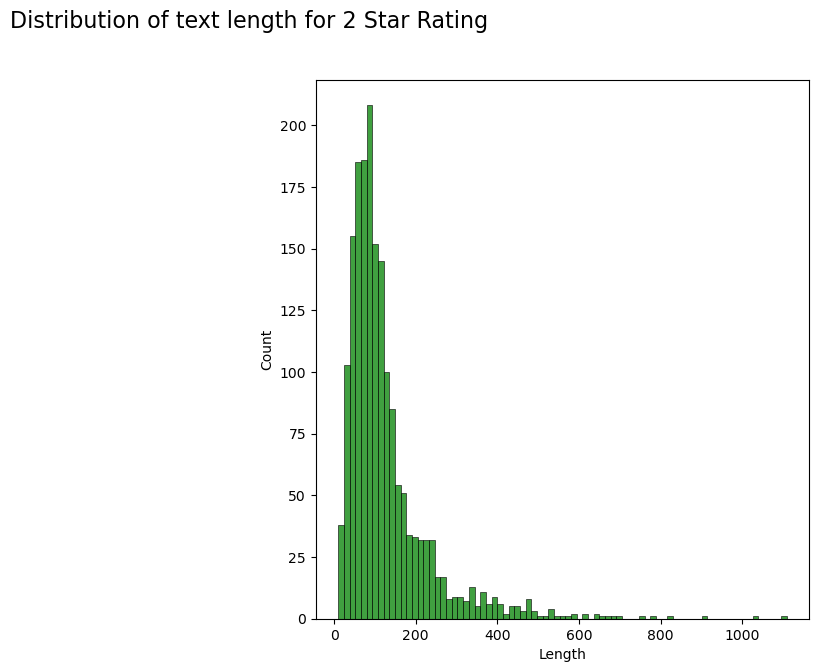

In [ ]:
# Distribution of text length for 2 Star Rating

fig = plt.figure(figsize=(14,7))
hotel_data["Length"] = hotel_data.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(hotel_data[hotel_data['Rating']==2]['Length'], ax=ax1,color='green')
fig.suptitle('Distribution of text length for 2 Star Rating', fontsize=16)
display(hotel_data.Length[hotel_data.Rating==2].describe())

In [ ]:
# Distribution of text length for 1 Star Rating

fig = plt.figure(figsize=(14,7))
hotel_data["Length"] = hotel_data.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(hotel_data[hotel_data['Rating']==1]['Length'], ax=ax1,color='green')
fig.suptitle('Distribution of text length for 1 Star Rating', fontsize=16)
display(hotel_data.Length[hotel_data.Rating==1].describe())

count    1421.000000
mean      112.365236
std        99.834855
min        12.000000
25%        51.000000
50%        82.000000
75%       137.000000
max       954.000000
Name: Length, dtype: float64

#
    From above distribution we can see most of peoples are writing a review between 50-200 words

# WordCloud

In [ ]:
from wordcloud import WordCloud

# WordCloud for Negative Ratings

In [ ]:
# Here Ratings below 3 star can cosider as Negative Rating

plt.figure(figsize=(20,20))
Neg_wc = WordCloud(max_words=2000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(" ".join(hotel_data[hotel_data["Rating"]<3].Review))
plt.imshow(Neg_wc)

# WordCloud for Neutral Ratings

In [ ]:
# Here 3 star Ratings can cosider as Neutral Rating

plt.figure(figsize=(20,20))
Neutral_wc = WordCloud(max_words=2000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(" ".join(hotel_data[hotel_data["Rating"]==3].Review))
plt.imshow(Neutral_wc)

# WordCloud for Positive Ratings

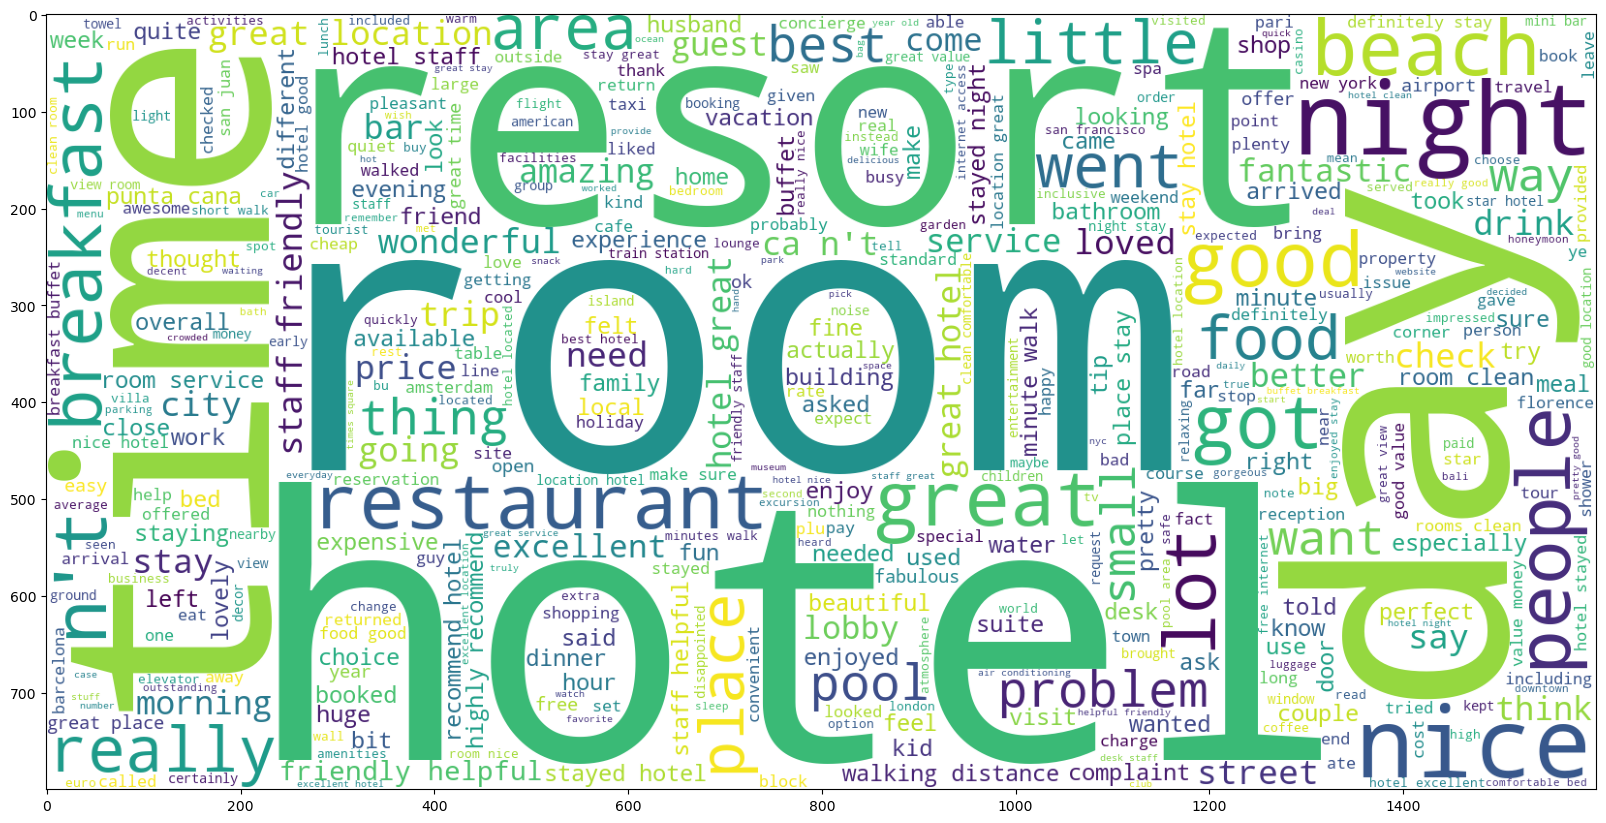

In [ ]:
# Here Ratings above 3 star can cosider as Positive Rating

plt.figure(figsize=(20,20))
Pos_wc = WordCloud(max_words=2000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(" ".join(hotel_data[hotel_data["Rating"]>3].Review))
plt.imshow(Pos_wc)

In [ ]:
# Assuming 'hotel' is your DataFrame with a 'rating' column
# Categorize ratings as Positive, Neutral, or Negative (customize threshold values)

hotel_data['sentiment'] = pd.cut(hotel_data['Rating'], bins=[-float('inf'), 3, 4, float('inf')], labels=['Negative', 'Neutral', 'Positive'])

# Count the occurrences of each sentiment

sentiment_counts = hotel_data['sentiment'].value_counts()
sentiment_counts

sentiment
Positive    9054
Neutral     6039
Negative    5398
Name: count, dtype: int64

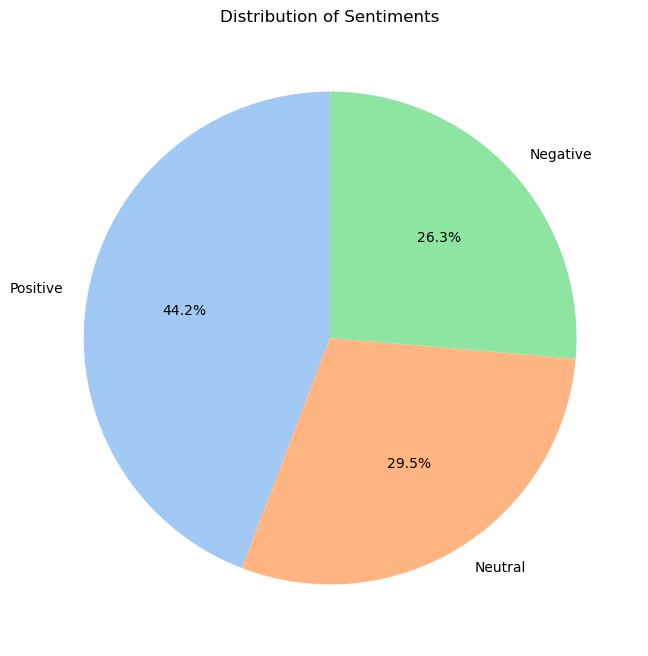

In [ ]:
# Distribution of Sentiments using pie chart

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Sentiments')
plt.show()

#
    -> From the above distribution of Sentiments we can see Negative and Neutral ratings are almost equal, but positive ratings are more than others.

# NLP Approach for Sentiment Analysis:
    
    

# Data Cleaning & Text Preprocessing

In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [ ]:
# function for cleaning Review

def standardize_text(hotel_data, field):
    hotel_data[field] = hotel_data[field].str.replace(r"http\S+", "")
    hotel_data[field] = hotel_data[field].str.replace(r"http","")
    hotel_data[field] = hotel_data[field].str.replace(r"@/S+","")
    hotel_data[field] = hotel_data[field].str.replace(r"[^A-Za-z(),!?@\'\`\"\_\n]", " ")
    hotel_data[field] = hotel_data[field].str.replace(r"@"," at ")
    hotel_data[field] = hotel_data[field].str.lower()
    return hotel_data

In [ ]:
standardize_text(hotel_data,"Review")

Review  Rating  Length  \
0      nice hotel expensive parking got good deal sta...       4      87   
1      ok nothing special charge diamond member hilto...       2     250   
2      nice rooms not 4* experience hotel monaco seat...       3     217   
3      unique, great stay, wonderful time hotel monac...       5      89   
4      great stay great stay, went seahawk game aweso...       5     191   
...                                                  ...     ...     ...   
20486  best kept secret 3rd time staying charm, not 5...       5     109   
20487  great location price view hotel great quick pl...       4      39   
20488  ok just looks nice modern outside, desk staff ...       2      63   
20489  hotel theft ruined vacation hotel opened sept ...       1     781   
20490  people talking, ca n't believe excellent ratin...       2      90   

      sentiment  
0       Neutral  
1      Negative  
2      Negative  
3      Positive  
4      Positive  
...         ...  
20486  Positive  
20487   Neutral  
20488  Negative  
20489  Negative  
20490  Negative  

[20491 rows x 4 columns]

In [ ]:
#Testing purpose - Verifying the sample review
len(hotel_data['Review'][2])

1427

# Applying Stemming and Lemmatization

In [ ]:
# Stemming

ps = PorterStemmer()
en_stopwords = set(stopwords.words('english'))
corpus = []
for i in range(0,len(hotel_data)):
    review = re.sub('[^a-zA-Z]', ' ', hotel_data['Review'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if word not in en_stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[:1]

['nice hotel expens park got good deal stay hotel anniversari arriv late even took advic previou review valet park check quick easi littl disappoint non exist view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night']

In [ ]:
# Lemmatization

lemmatizer = WordNetLemmatizer()
en_stopwords = set(stopwords.words('english'))
corpus = []
for i in range(0, len(hotel_data)):
    review = re.sub('[^a-zA-Z]', ' ', hotel_data['Review'][i])
    review = review.split()
    review = [word for word in review if not word in en_stopwords]
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[:1]

['nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night']

In [ ]:
# Converting sentiments into binary

def sentiment(review):
    if review>=3:
        return 1
    else:
        return 0
hotel_data['Sentiment']= hotel_data['Rating'].apply(sentiment)

In [ ]:
hotel_data.head(10)

Review  Rating  Length  \
0  nice hotel expensive parking got good deal sta...       4      87   
1  ok nothing special charge diamond member hilto...       2     250   
2  nice rooms not 4* experience hotel monaco seat...       3     217   
3  unique, great stay, wonderful time hotel monac...       5      89   
4  great stay great stay, went seahawk game aweso...       5     191   
5  love monaco staff husband stayed hotel crazy w...       5     134   
6  cozy stay rainy city, husband spent 7 nights m...       5     101   
7  excellent staff, housekeeping quality hotel ch...       4      85   
8  hotel stayed hotel monaco cruise, rooms genero...       5      59   
9  excellent stayed hotel monaco past w/e delight...       5      35   

  sentiment  Sentiment  
0   Neutral          1  
1  Negative          0  
2  Negative          1  
3  Positive          1  
4  Positive          1  
5  Positive          1  
6  Positive          1  
7   Neutral          1  
8  Positive          1  
9  Positive          1

# Polarity and Subjectivity Score using "textblob"

In [ ]:
import textblob
from textblob import TextBlob

In [ ]:
hotel_data["Polarity_score"]=hotel_data['Review'].apply(lambda x:TextBlob(x).sentiment.polarity)
hotel_data["Subjectivity"]=hotel_data['Review'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
hotel_data

Review  Rating  Length  \
0      nice hotel expensive parking got good deal sta...       4      87   
1      ok nothing special charge diamond member hilto...       2     250   
2      nice rooms not 4* experience hotel monaco seat...       3     217   
3      unique, great stay, wonderful time hotel monac...       5      89   
4      great stay great stay, went seahawk game aweso...       5     191   
...                                                  ...     ...     ...   
20486  best kept secret 3rd time staying charm, not 5...       5     109   
20487  great location price view hotel great quick pl...       4      39   
20488  ok just looks nice modern outside, desk staff ...       2      63   
20489  hotel theft ruined vacation hotel opened sept ...       1     781   
20490  people talking, ca n't believe excellent ratin...       2      90   

      sentiment  Sentiment  Polarity_score  Subjectivity  
0       Neutral          1        0.208744      0.687000  
1      Negative          0        0.214923      0.495009  
2      Negative          1        0.294420      0.605208  
3      Positive          1        0.504825      0.691228  
4      Positive          1        0.384615      0.629396  
...         ...        ...             ...           ...  
20486  Positive          1        0.221729      0.508586  
20487   Neutral          1        0.503704      0.622222  
20488  Negative          0        0.171220      0.524304  
20489  Negative          0        0.122573      0.533441  
20490  Negative          0        0.110615      0.626190  

[20491 rows x 7 columns]

# Applying TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, tokenizer = word_tokenize)

In [ ]:
X = tfidf_vectorizer.fit_transform(corpus)
y = hotel_data['Sentiment']

# Splitting Data into Training and Testing Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=24)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16392, 10000)
(16392,)
(4099, 10000)
(4099,)


# Model Building

# 1. AdaBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model=AdaBoostClassifier()
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
#Accuracy score

y_pred_train = ada_model.predict(X_train)

print(metrics.accuracy_score(y_train, y_pred_train))

0.9118472425573451


In [ ]:
#Classification report

print(classification_report(y_train, y_pred_train ))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69      2577
           1       0.93      0.97      0.95     13815

    accuracy                           0.91     16392
   macro avg       0.85      0.79      0.82     16392
weighted avg       0.91      0.91      0.91     16392



# 2. Decisison Tree

In [ ]:
from sklearn.tree import  DecisionTreeClassifier

# Using Gini Method

In [ ]:
# Gini

dt_model1 = DecisionTreeClassifier(max_depth=10,criterion = 'gini')

In [ ]:
dt_model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
#Accuracy score

dt_pred_train = dt_model1.predict(X_train)

print(metrics.accuracy_score(y_train, dt_pred_train))

0.9188018545632015


In [ ]:
#Classification report

print(classification_report(y_train, dt_pred_train ))

              precision    recall  f1-score   support

           0       0.88      0.56      0.68      2577
           1       0.92      0.99      0.95     13815

    accuracy                           0.92     16392
   macro avg       0.90      0.77      0.82     16392
weighted avg       0.92      0.92      0.91     16392



In [ ]:
# Classification report

dc_pred_test = dt_model1.predict(X_test)

print(classification_report(y_test, dc_pred_test ))

              precision    recall  f1-score   support

           0       0.69      0.40      0.50       637
           1       0.90      0.97      0.93      3462

    accuracy                           0.88      4099
   macro avg       0.79      0.68      0.72      4099
weighted avg       0.86      0.88      0.86      4099



# Using Entropy Method

In [ ]:
# Entropy

dt_model2 = DecisionTreeClassifier(max_depth=10,criterion = 'entropy')

In [ ]:
dt_model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
#Accuracy score

dt_pred_train2 = dt_model2.predict(X_train)

print(metrics.accuracy_score(y_train, dt_pred_train2))

0.911542215714983


In [ ]:
#Classification report

print(classification_report(y_train, dt_pred_train2 ))

              precision    recall  f1-score   support

           0       0.91      0.48      0.63      2577
           1       0.91      0.99      0.95     13815

    accuracy                           0.91     16392
   macro avg       0.91      0.74      0.79     16392
weighted avg       0.91      0.91      0.90     16392



In [ ]:
# Classification report

dc_pred_test2 = dt_model2.predict(X_test)

print(classification_report(y_test, dc_pred_test2 ))

              precision    recall  f1-score   support

           0       0.63      0.31      0.42       637
           1       0.88      0.97      0.92      3462

    accuracy                           0.86      4099
   macro avg       0.76      0.64      0.67      4099
weighted avg       0.84      0.86      0.84      4099



#                 
    -> So here in Decision Tree Gini method giving best accuracy than Entropy.

# 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Accuracy score

rf_pred_train = rf_model.predict(X_train)

print(metrics.accuracy_score(y_train, rf_pred_train))

1.0


In [ ]:
#Classification report

print(classification_report(y_train, rf_pred_train ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2577
           1       1.00      1.00      1.00     13815

    accuracy                           1.00     16392
   macro avg       1.00      1.00      1.00     16392
weighted avg       1.00      1.00      1.00     16392



# 4. NaiveBayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Using MultinomialNB Naive Bayes

In [ ]:
# Using Multinomial Naive Bayes

mnb_model = MultinomialNB()
mnb_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#Accuracy score

mnb_pred_train = mnb_model.predict(X_train)

print(metrics.accuracy_score(y_train, mnb_pred_train))

0.926183504148365


In [ ]:
#Classification report

print(classification_report(y_train, mnb_pred_train ))

              precision    recall  f1-score   support

           0       0.89      0.60      0.72      2577
           1       0.93      0.99      0.96     13815

    accuracy                           0.93     16392
   macro avg       0.91      0.79      0.84     16392
weighted avg       0.92      0.93      0.92     16392



# 5. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
#kernel = linear

svm_linear_model = SVC(kernel='linear',random_state=0)

svm_linear = CalibratedClassifierCV(svm_linear_model)
svm_linear.fit(X_train, y_train)

CalibratedClassifierCV(estimator=SVC(kernel='linear', random_state=0))

In [ ]:
svm_pred_train = svm_linear.predict(X_train)
svm_pred_test = svm_linear.predict(X_test)

In [ ]:
#Accuracy score

print(metrics.accuracy_score(y_train, svm_pred_train))
print(metrics.accuracy_score(y_test, svm_pred_test))

0.9740117130307467
0.9299829226640645


#
    -> Here I have used only Linear SVM, because of large dataset. If we use other SVM model like 'Poly', 'rbf' & 'Sigmoid' then it will take a long time to run.

# 6. XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg_model = XGBClassifier(learning_rate=0.003)
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.003, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Accuracy score

xg_pred_train = xg_model.predict(X_train)

print(metrics.accuracy_score(y_train, xg_pred_train))

0.8427891654465594


In [ ]:
#Classification report

print(classification_report(y_train, xg_pred_train ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2577
           1       0.84      1.00      0.91     13815

    accuracy                           0.84     16392
   macro avg       0.42      0.50      0.46     16392
weighted avg       0.71      0.84      0.77     16392



# Model Evaluation

# 1. AdaBoost

In [ ]:
#Classification report

y_pred_test = ada_model.predict(X_test)

print(classification_report(y_test, y_pred_test ))

              precision    recall  f1-score   support

           0       0.79      0.57      0.66       637
           1       0.92      0.97      0.95      3462

    accuracy                           0.91      4099
   macro avg       0.86      0.77      0.80      4099
weighted avg       0.90      0.91      0.90      4099



In [ ]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1 Score:",metrics.f1_score(y_test, y_pred_test))

Accuracy: 0.9092461575994145
Precision: 0.9239846322722283
Recall: 0.9725592143269787
F1 Score: 0.9476498733464678


In [ ]:
# AUC Score

adaboost_auc = roc_auc_score(y_test, y_pred_test)
adaboost_auc

0.7688541754523432

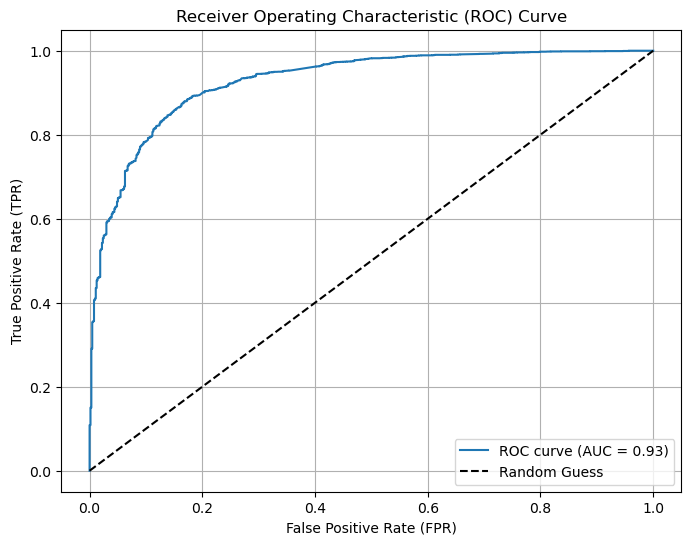

In [ ]:
y_prob = ada_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

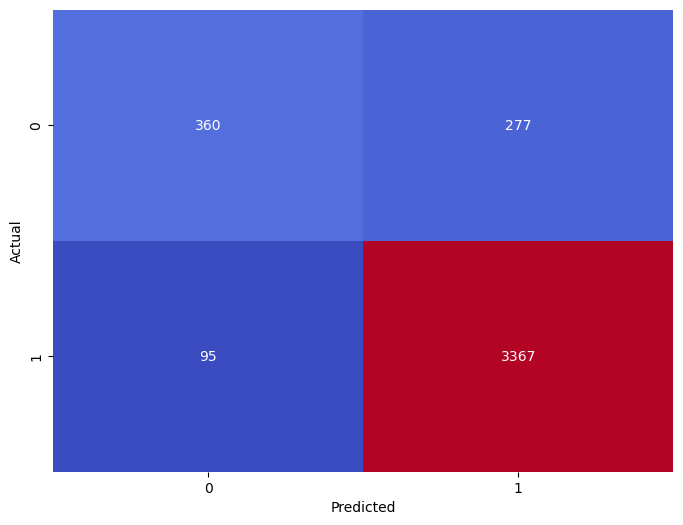

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Decisison Tree

In [ ]:
# Classification report

dc_pred_test = dt_model1.predict(X_test)

print(classification_report(y_test, dc_pred_test ))

              precision    recall  f1-score   support

           0       0.69      0.40      0.50       637
           1       0.90      0.97      0.93      3462

    accuracy                           0.88      4099
   macro avg       0.79      0.68      0.72      4099
weighted avg       0.86      0.88      0.86      4099



In [ ]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(y_test, dc_pred_test))
print("Precision:",metrics.precision_score(y_test, dc_pred_test))
print("Recall:",metrics.recall_score(y_test, dc_pred_test))
print("F1 Score:",metrics.f1_score(y_test, dc_pred_test))

Accuracy: 0.8782629909734081
Precision: 0.8972914990614106
Recall: 0.9664933564413634
F1 Score: 0.9306077040745377


In [ ]:
# AUC Score

logit_roc_auc = roc_auc_score(y_test, dc_pred_test)
logit_roc_auc

0.6826187347355953

In [ ]:
y_prob = dt_model1.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, dc_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Random Forest

In [ ]:
# Classification report

rf_pred_test = rf_model.predict(X_test)

print(classification_report(y_test, rf_pred_test ))

              precision    recall  f1-score   support

           0       0.93      0.35      0.51       637
           1       0.89      0.99      0.94      3462

    accuracy                           0.89      4099
   macro avg       0.91      0.67      0.72      4099
weighted avg       0.90      0.89      0.87      4099



In [ ]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(y_test, rf_pred_test))
print("Precision:",metrics.precision_score(y_test, rf_pred_test))
print("Recall:",metrics.recall_score(y_test, rf_pred_test))
print("F1 Score:",metrics.f1_score(y_test, rf_pred_test))

Accuracy: 0.8943644791412539
Precision: 0.8924591863176989
Recall: 0.9948006932409013
F1 Score: 0.9408550744433821


In [ ]:
# AUC Score

logit_roc_auc = roc_auc_score(y_test, rf_pred_test)
logit_roc_auc

0.6716546637319105

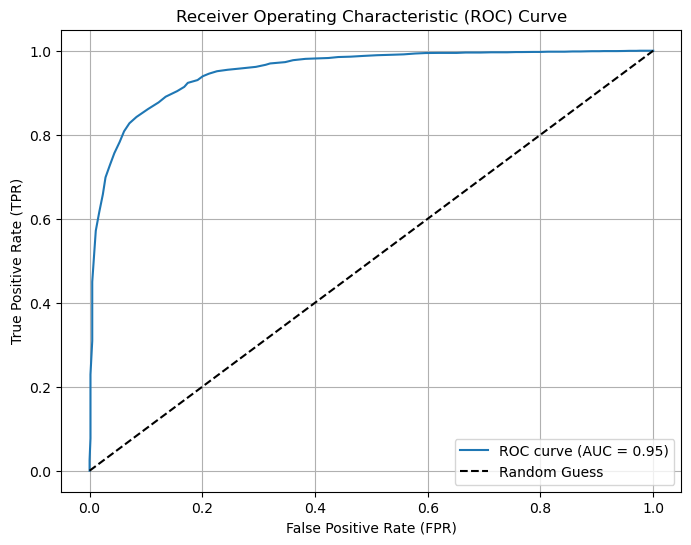

In [ ]:
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, rf_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Naive Bayes

In [ ]:
# Classification report

mnb_pred_test = mnb_model.predict(X_test)

print(classification_report(y_test, mnb_pred_test ))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66       637
           1       0.92      0.99      0.95      3462

    accuracy                           0.91      4099
   macro avg       0.90      0.76      0.81      4099
weighted avg       0.91      0.91      0.91      4099



In [ ]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(y_test, mnb_pred_test))
print("Precision:",metrics.precision_score(y_test, mnb_pred_test))
print("Recall:",metrics.recall_score(y_test, mnb_pred_test))
print("F1 Score:",metrics.f1_score(y_test, mnb_pred_test))

Accuracy: 0.9148572822639668
Precision: 0.9194287254109405
Recall: 0.9855574812247256
F1 Score: 0.9513453227380455


In [ ]:
# AUC Score

logit_roc_auc = roc_auc_score(y_test, mnb_pred_test)
logit_roc_auc

0.7580848630613424

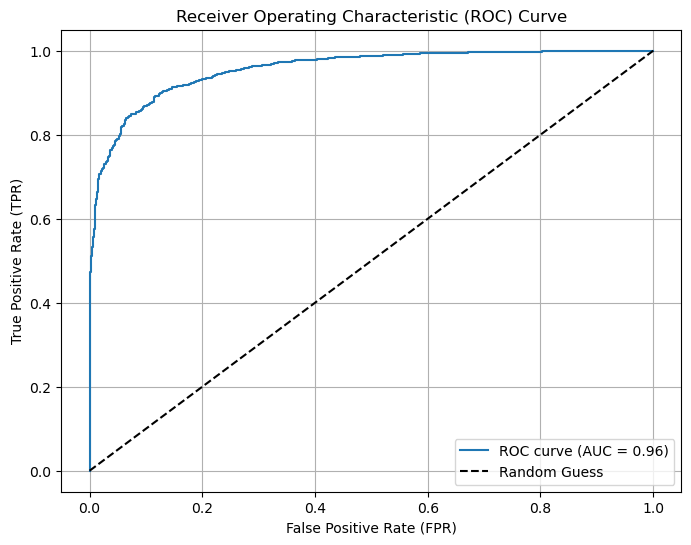

In [ ]:
y_prob = mnb_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

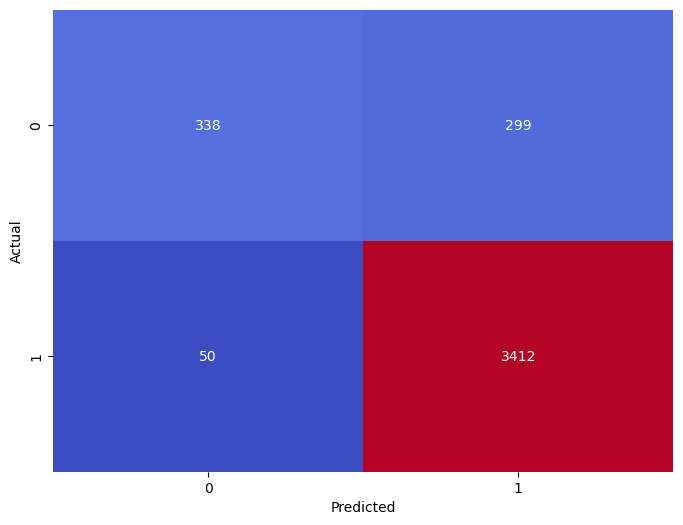

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, mnb_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. Support Vector Machine

In [ ]:
# Classification report

svm_linear_pred_test = svm_linear.predict(X_test)

print(classification_report(y_test, svm_linear_pred_test ))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       637
           1       0.95      0.97      0.96      3462

    accuracy                           0.93      4099
   macro avg       0.89      0.83      0.86      4099
weighted avg       0.93      0.93      0.93      4099



In [ ]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(y_test, svm_linear_pred_test))
print("Precision:",metrics.precision_score(y_test, svm_linear_pred_test))
print("Recall:",metrics.recall_score(y_test, svm_linear_pred_test))
print("F1 Score:",metrics.f1_score(y_test, svm_linear_pred_test))

Accuracy: 0.9299829226640645
Precision: 0.945551501543643
Recall: 0.9731369150779896
F1 Score: 0.9591459074733095


In [ ]:
# AUC Score

logit_roc_auc = roc_auc_score(y_test, svm_linear_pred_test)
logit_roc_auc

0.8342921624055568

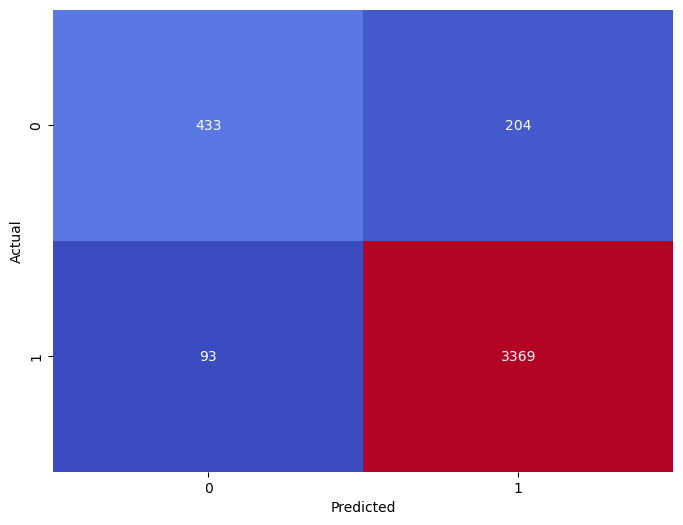

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, svm_linear_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. XGBoost

In [ ]:
# Classification report

xg_pred_test = xg_model.predict(X_test)

print(classification_report(y_test, xg_pred_test ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       637
           1       0.84      1.00      0.92      3462

    accuracy                           0.84      4099
   macro avg       0.42      0.50      0.46      4099
weighted avg       0.71      0.84      0.77      4099



In [ ]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(y_test, xg_pred_test))
print("Precision:",metrics.precision_score(y_test, xg_pred_test))
print("Recall:",metrics.recall_score(y_test, xg_pred_test))
print("F1 Score:",metrics.f1_score(y_test, xg_pred_test))

Accuracy: 0.8445962429860941
Precision: 0.8445962429860941
Recall: 1.0
F1 Score: 0.9157518846713398


In [ ]:
# AUC Score

logit_roc_auc = roc_auc_score(y_test, xg_pred_test)
logit_roc_auc

0.5

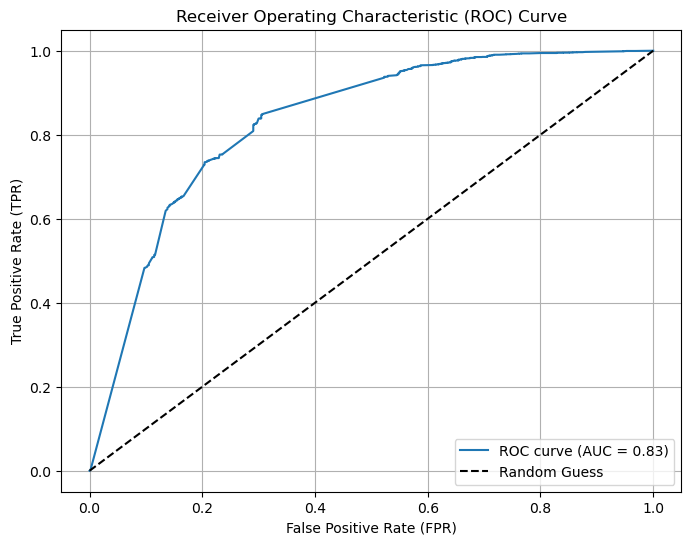

In [ ]:
y_prob = xg_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

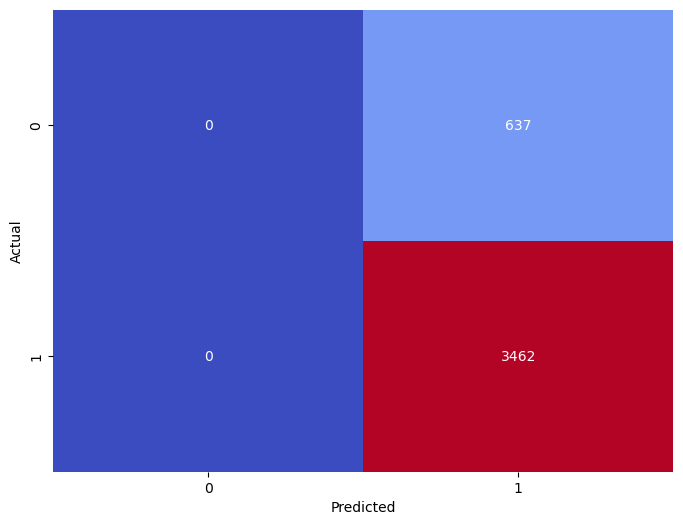

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, xg_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Performance

In [ ]:
results = pd.DataFrame()
results['Algorithm'] = ['AdaBoost','DecisionTree','RandomForest','NaiveBayes','SVM','XGBoost']
results['Train_Accuracy'] = [0.91,0.92,1.00,0.93,0.97,0.84]
results['Test_Accuracy'] = [0.91,0.88,0.90,0.91,0.93,0.84]
results['Precision'] = [0.92,0.90,0.89,0.92,0.94,0.84]
results['Recall'] = [0.97,0.97,0.99,0.98,0.97,1.00]
results['F1 Score'] = [0.95,0.93,0.94,0.95,0.96,0.92]
results['AUC-Score'] = [0.76,0.68,0.68,0.76,0.83,0.50]

In [ ]:
results

Algorithm  Train_Accuracy  Test_Accuracy  Precision  Recall  F1 Score  \
0      AdaBoost            0.91           0.91       0.92    0.97      0.95   
1  DecisionTree            0.92           0.88       0.90    0.97      0.93   
2  RandomForest            1.00           0.90       0.89    0.99      0.94   
3    NaiveBayes            0.93           0.91       0.92    0.98      0.95   
4           SVM            0.97           0.93       0.94    0.97      0.96   
5       XGBoost            0.84           0.84       0.84    1.00      0.92   

   AUC-Score  
0       0.76  
1       0.68  
2       0.68  
3       0.76  
4       0.83  
5       0.50

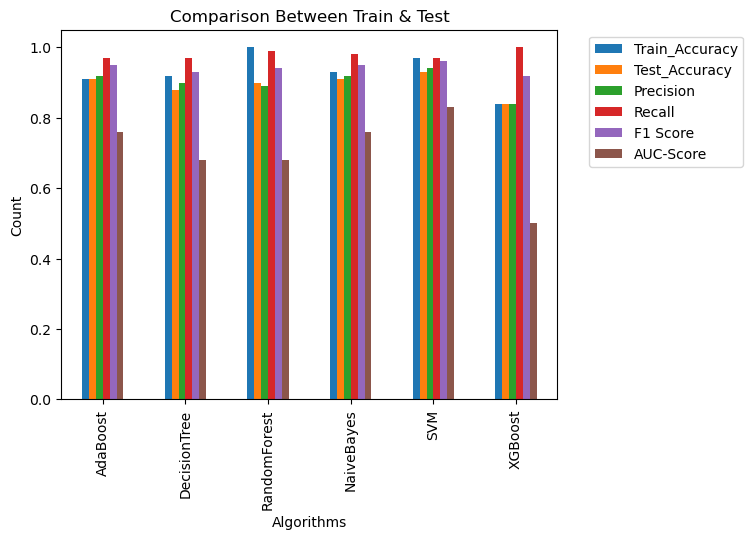

In [ ]:
results.plot(
    x="Algorithm", y=["Train_Accuracy", "Test_Accuracy","Precision","Recall","F1 Score","AUC-Score"], kind="bar")
plt.title("Comparison Between Train & Test")
plt.xlabel("Algorithms")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# So according to the results SVM model is the best performer.

# Saving the trained model

In [ ]:
import pickle

In [ ]:
# Sentiment

In [ ]:
pickle_out = open("svm_linear.pkl",mode = "wb")
pickle.dump(svm_linear,pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("tfidf_vectorizer.pkl",mode = "wb")
pickle.dump(tfidf_vectorizer,pickle_out)
pickle_out.close()

In [ ]:
print(type(svm_linear))

<class 'sklearn.calibration.CalibratedClassifierCV'>
